# Crime rate - Multiple linear regression
## In this adhoc project, I will be predicting the per capita crime rate using the Boston data from the ISLP package.
### **1. Importing libraries and loading data**

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP.models import (ModelSpec as MS, summarize, poly)
from ISLP import load_data

In [41]:
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [42]:
Boston.shape

(506, 13)

### This dataset contains 506 entries and 12 predictors with the crim (per capita crime rate) as the response
### **2. Model selection**
### In the 'multiple linear regression' project I introduced the concept of model selection methodology and demonstrated a backward selection process. For this project I will introduce the concept of mixed model selection an approach that combines foward and backward model selection.
### For this process I will determine the statistical significance of each predictor by fitting a simple linear regression on the response vs each predictor.
### Statistical significance will be determined using the t-statistic and p-value that is less than 0.05. This approach is an example of foward selection, determining the predictors that are relevant in predicting the crime rate before fitting our multiple linear regression.

In [43]:
# Printing the table header with t-statistic and p-value
print('{:>9} {:>22} {:>24}'.format('predictor', 't-statistic', 'pvalue'))

# Initialize an empty dictionary to store t-statistic values
t_statistics = {}
predictors = Boston.columns.drop(['crim'])

# Loop through each predictor and perform a univariate linear regression
for predictor in predictors:
    X = MS([predictor]).fit_transform(Boston)
    y = Boston['crim']
    model = sm.OLS(y, X)
    rslt = model.fit()
    
    # Print the predictor name, t-statistic, and p-value
    print('{:>9} {:>22} {:>24.2f}'.format(predictor, rslt.tvalues[predictor], rslt.pvalues[predictor]))
    
    # Store the t-statistic value for the predictor in the 't_statistics' dictionary
    t_statistics[predictor] = [rslt.tvalues[predictor]]

predictor            t-statistic                   pvalue
       zn    -4.5937764773026455                     0.00
    indus      9.990847656564355                     0.00
     chas    -1.2567273700752104                     0.21
      nox     10.418988872173317                     0.00
       rm     -5.044819484761438                     0.00
      age       8.46282468262107                     0.00
      dis      -9.21345807307415                     0.00
      rad     17.998199143110973                     0.00
      tax     16.099388012588346                     0.00
  ptratio      6.801430235520168                     0.00
    lstat      11.49065379562301                     0.00
     medv     -9.459710077887218                     0.00


### Using the t-statistic (which measures how many standard errors the coefficient estimate is away from zero) and a p-value that is less than 0.05, we can conclude that all the predictors except for chas (neighbourhoods being adjacent to Charles river). This is to say that the Charles river does not have statistical significance in determining the crime rate in Boston.
### We will further investigate this assumption using regression plots for the response (crim) vs each predictor. This gives a good visual representation of the relationship between the response and the predictor

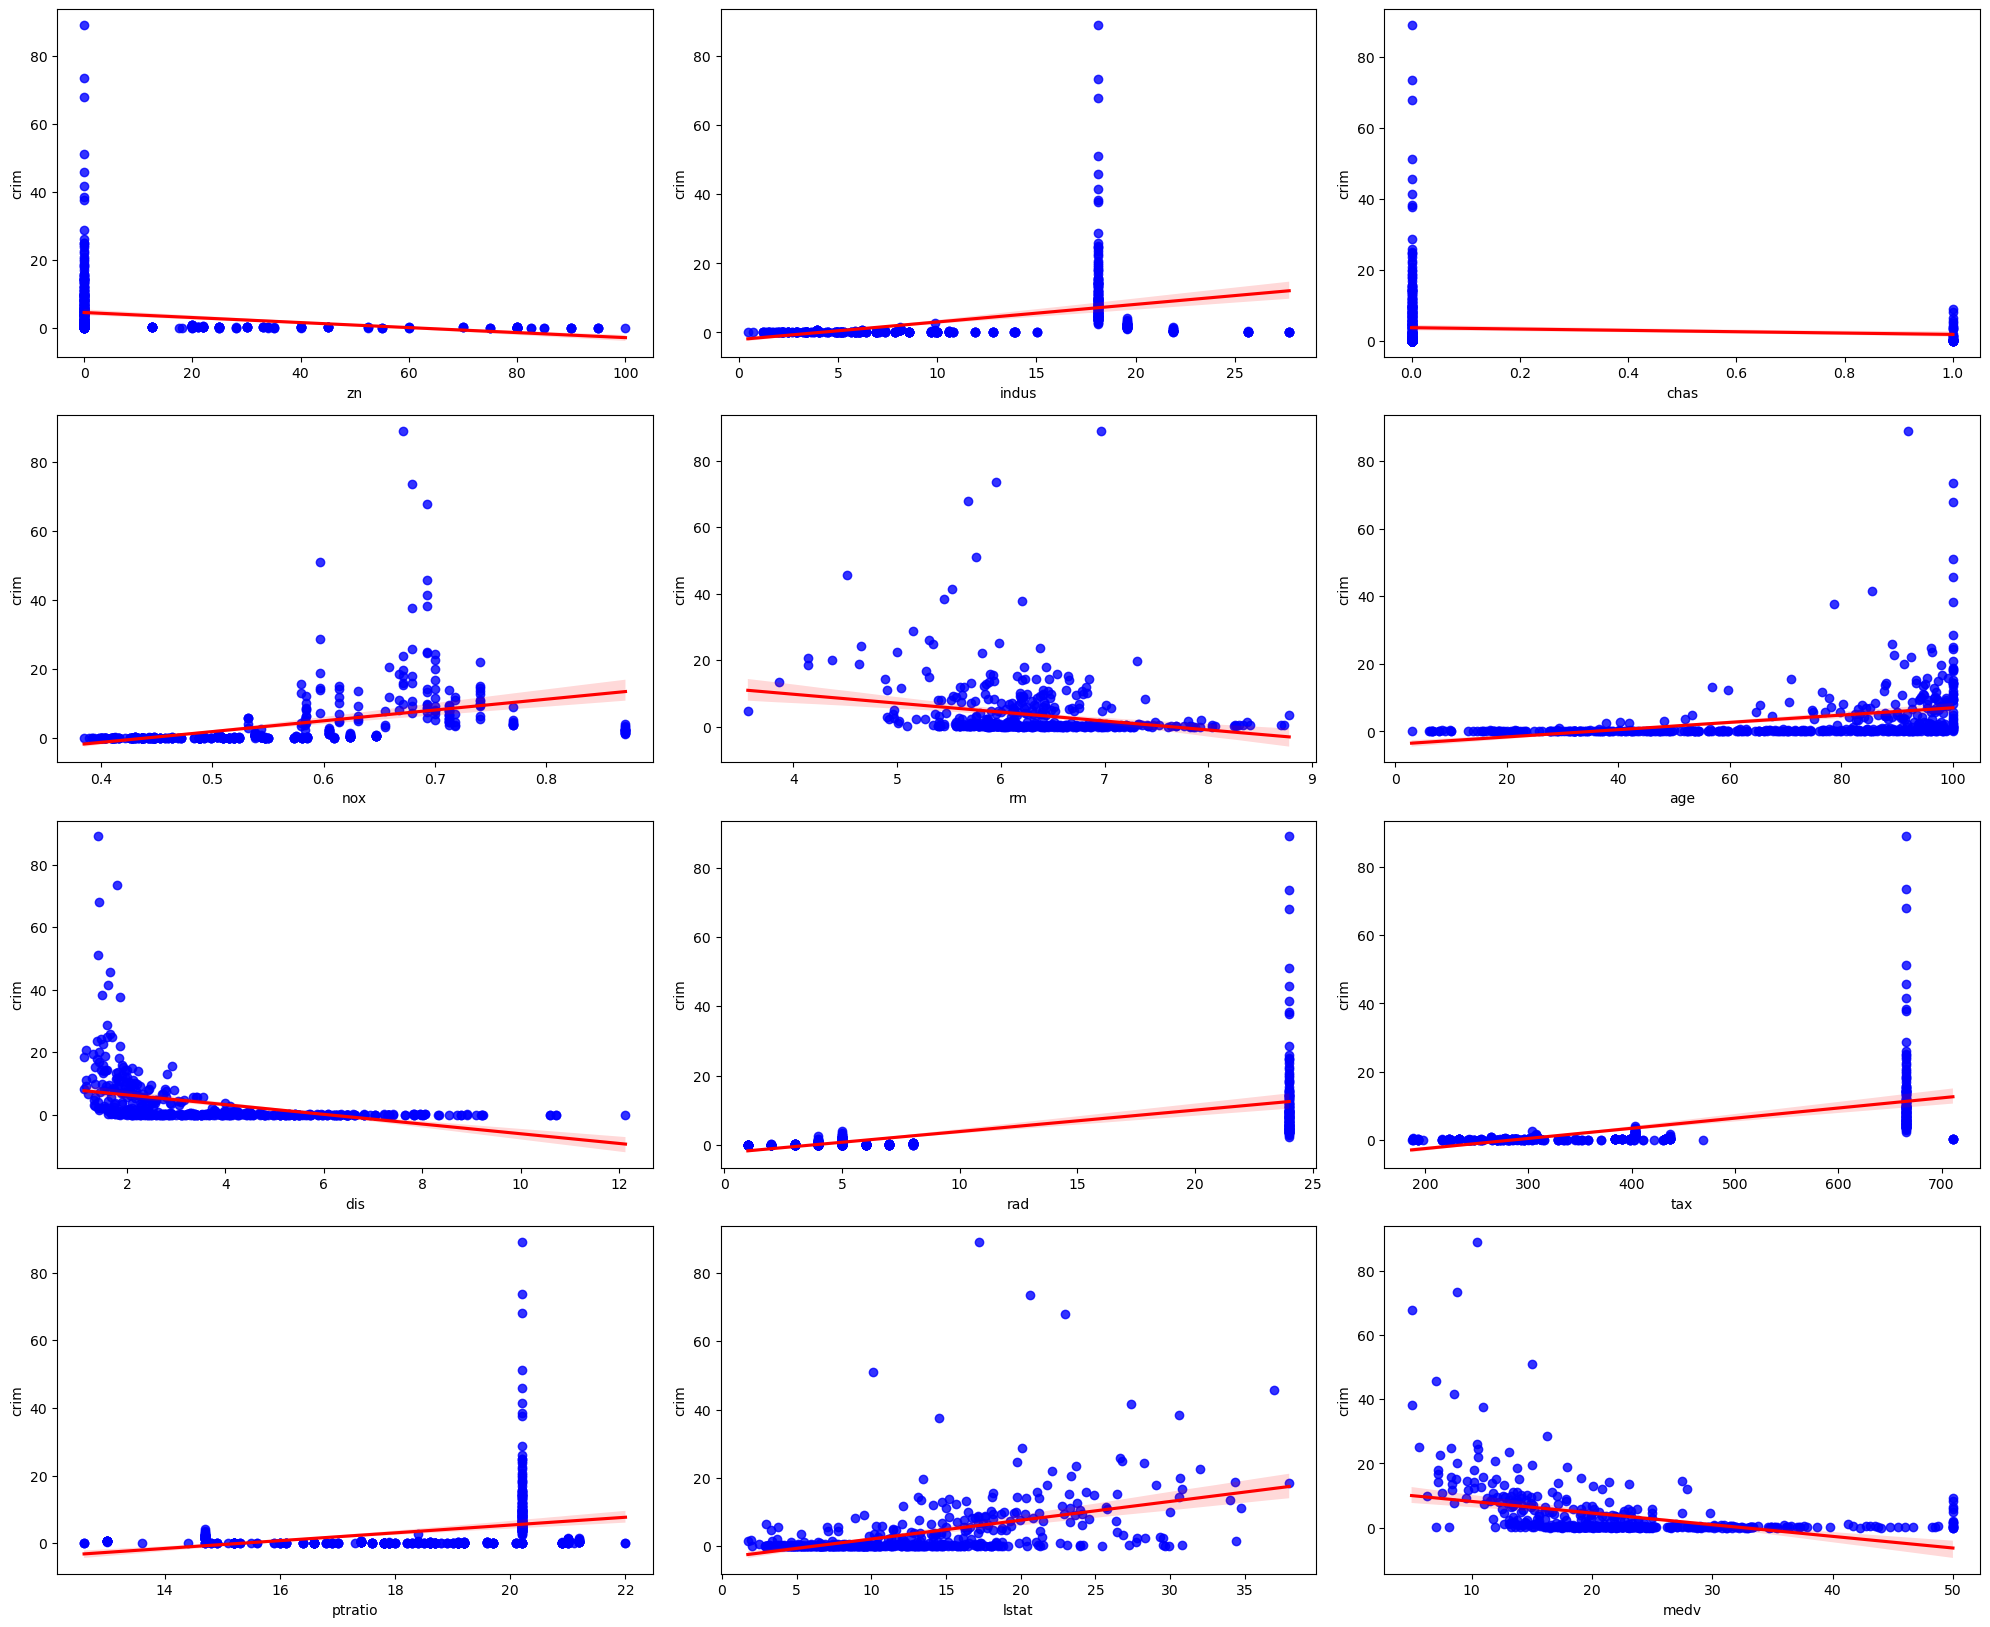

In [44]:
# Create a new figure with a size of 20 inches by 20 inches
plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    X = MS([predictor]).fit_transform(Boston)
    y = Boston['crim']
    model = sm.OLS(y, X)
    rslt = model.fit()
    # Create a subplot for each predictor within the figure. The subplot is arranged in a grid with 5 rows and 3 columns.
    plt.subplot(5, 3, i + 1)
    
    # Use sns.regplot() to create scatter plot with fitted regression line
    sns.regplot(x=predictor, y='crim', data= Boston, color='blue', line_kws={'color': 'red'})
    
    # Set the X-axis label as the predictor variable name.
    plt.xlabel(predictor)
    
    # Set the Y-axis label as 'CRIM.'
    plt.ylabel('crim')

# Adjust layout to avoid overlapping plots
plt.tight_layout()

# Display the entire figure
plt.show()

### The slopes of the regression line indicates that some relationship exists between the response and the predictors.
### Using above assumptions, we create a model with all our predictors except chas.
### **3. Multiple linear regression**

In [45]:
predictors1 = Boston.columns.drop(['crim','chas'])
X = MS(predictors1).fit_transform(Boston)
y = Boston['crim']
model = sm.OLS(y, X)
rslt = model.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     36.57
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           4.15e-57
Time:                        09:55:42   Log-Likelihood:                -1655.7
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     494   BIC:                             3386.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.8458      7.077      1.956      0.051      -0.060      27.751
zn             0.0458      0.019      2.441      0.015       0.009       0.083
indus         -0.0642      0.083     -0.772      0.441      -0.228       0.099
nox          -10.1897      5.277     -1.931      0.054     -20.557       0.178
rm             0.6419      0.606      1.058      0.290      -0.550       1.834
age           -0.0015      0.018     -0.084      0.933      -0.037       0.034
dis           -1.0192      0.282     -3.613      0.000      -1.574      -0.465
rad            0.6084      0.087      6.969      0.000       0.437       0.780
tax           -0.0034      0.005     -0.665      0.506      -0.014       0.007
ptratio       -0.2988      0.186     -1.606      0.109      -0.664       0.067
lstat          0.1388      0.076      1.833      0.067      -0.010       0.287
medv          -0.2264      0.059     -3.832      0.000      -0.343      -0.110
==============================================================================
Omnibus:                      662.946   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80564.862
Skew:                           6.571   Prob(JB):                         0.00
Kurtosis:                      63.403   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using the results of the multiple linear regression and our stated rules for statistical significance, we reject the null hypotheses for zn, dis, rad and medv. 
### We can then remove all other predictors, this is an example of mixed model selection. We started with a forward selection and initially removing chas and fitting a multiple linear regression using 11 predictors. The process of reducing our model from 11 predictors to 4 predictors (zn, dis, rad and medv), is an example of a backward model selection, the combination of these processes is a mixed model selection.
### Next we will investigate the results our reduced model

In [46]:
predictors2 = Boston[['zn', 'dis', 'rad', 'medv']]
X = MS(predictors2).fit_transform(Boston)
y = Boston['crim']
model = sm.OLS(y, X)
rslt = model.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     95.84
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           1.65e-60
Time:                        09:55:42   Log-Likelihood:                -1662.6
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     501   BIC:                             3356.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.2655      1.347      3.910      0.000       2.620       7.911
zn             0.0549      0.017      3.163      0.002       0.021       0.089
dis           -0.7229      0.203     -3.569      0.000      -1.121      -0.325
rad            0.5002      0.040     12.370      0.000       0.421       0.580
medv          -0.1912      0.036     -5.362      0.000      -0.261      -0.121
==============================================================================
Omnibus:                      660.534   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78821.644
Skew:                           6.535   Prob(JB):                         0.00
Kurtosis:                      62.731   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### In comparing the two models we can observe that we do not have any improvement in the R-sqaured (how well the model explains variations in the crime rate), infact we have a ~2% decrease from 44.9 to 43.3 which can be rendered insignificant. The second model does however have a higher F-statistic of 95.84 compared to 36.57, which means the second model is more statistically significant in predicting the crime rate.
### Statisticall significance improves the models accuracy to provide more reliable results. Other reasons to choose a smaller model include avoiding overfitting the data and deriving relationships that aren't prevelent  and simplifying the model.
### **4. Results/Inferences**
### Using this model we can derive useful insights in assessing the relationship of the crime rate and the chosen predictors:
* ### Using the coef, we observe that the crime rate has a negative relationship with dis (the measured distance to five Boston employment centeres). This is to say that neighbourhoods that are further away from employment centeres tend to have lower the crime rates. This could be due to more people walking to work in close neighbourhoods thus increasing the number potential targets for criminal activities.
* ### We also note a negative relationship with the median house value. That is to say that neighbourhoods with higher median house values experience less crime. This could be due to the higher socioeconomic status of more expensive neighbourhoods which is usually coupled with better infrastructure and better security. 
* ### Larger lots (zn) tend to increase crime rate but looking at the coef, it has the lowest impact on crime rate. This could be due larger lots usually leading to less community interaction and lower population density, giving criminals opportunities to remain undetected. 
* ### Crime rate also increase with rad (accessibility to radial highways). The more accessible the neighboourhood is to radial highways the higher the crime rate in the neighbourhood. This could indicate easier access to escape routes, thus facilitating criminal activities.
### A quick note on zn, when modelled against crim without other predictors it has a negative relationship with crim, but when added to a model with other predictors it has a positive relationship. This introduces us to another important term, the synergy effect (zn is dependent on other factors in order to explain crime rate effectively).
### It is important to note that correlation does not imply causation. For causation effect, we need further research in understanding other factors that could cause a decrease/increase in the crime rate or explore more complex models that can better explain the crime rate in Boston. 
### Next we will introduce a polynomial regression model to investigate non-linearity between predictors and response. Since linear regression assumes a linear relationship, polynomials introduces flexibility in the regression line to better understand the true relationship between predictors and response.
### **5. Test for linearity** 

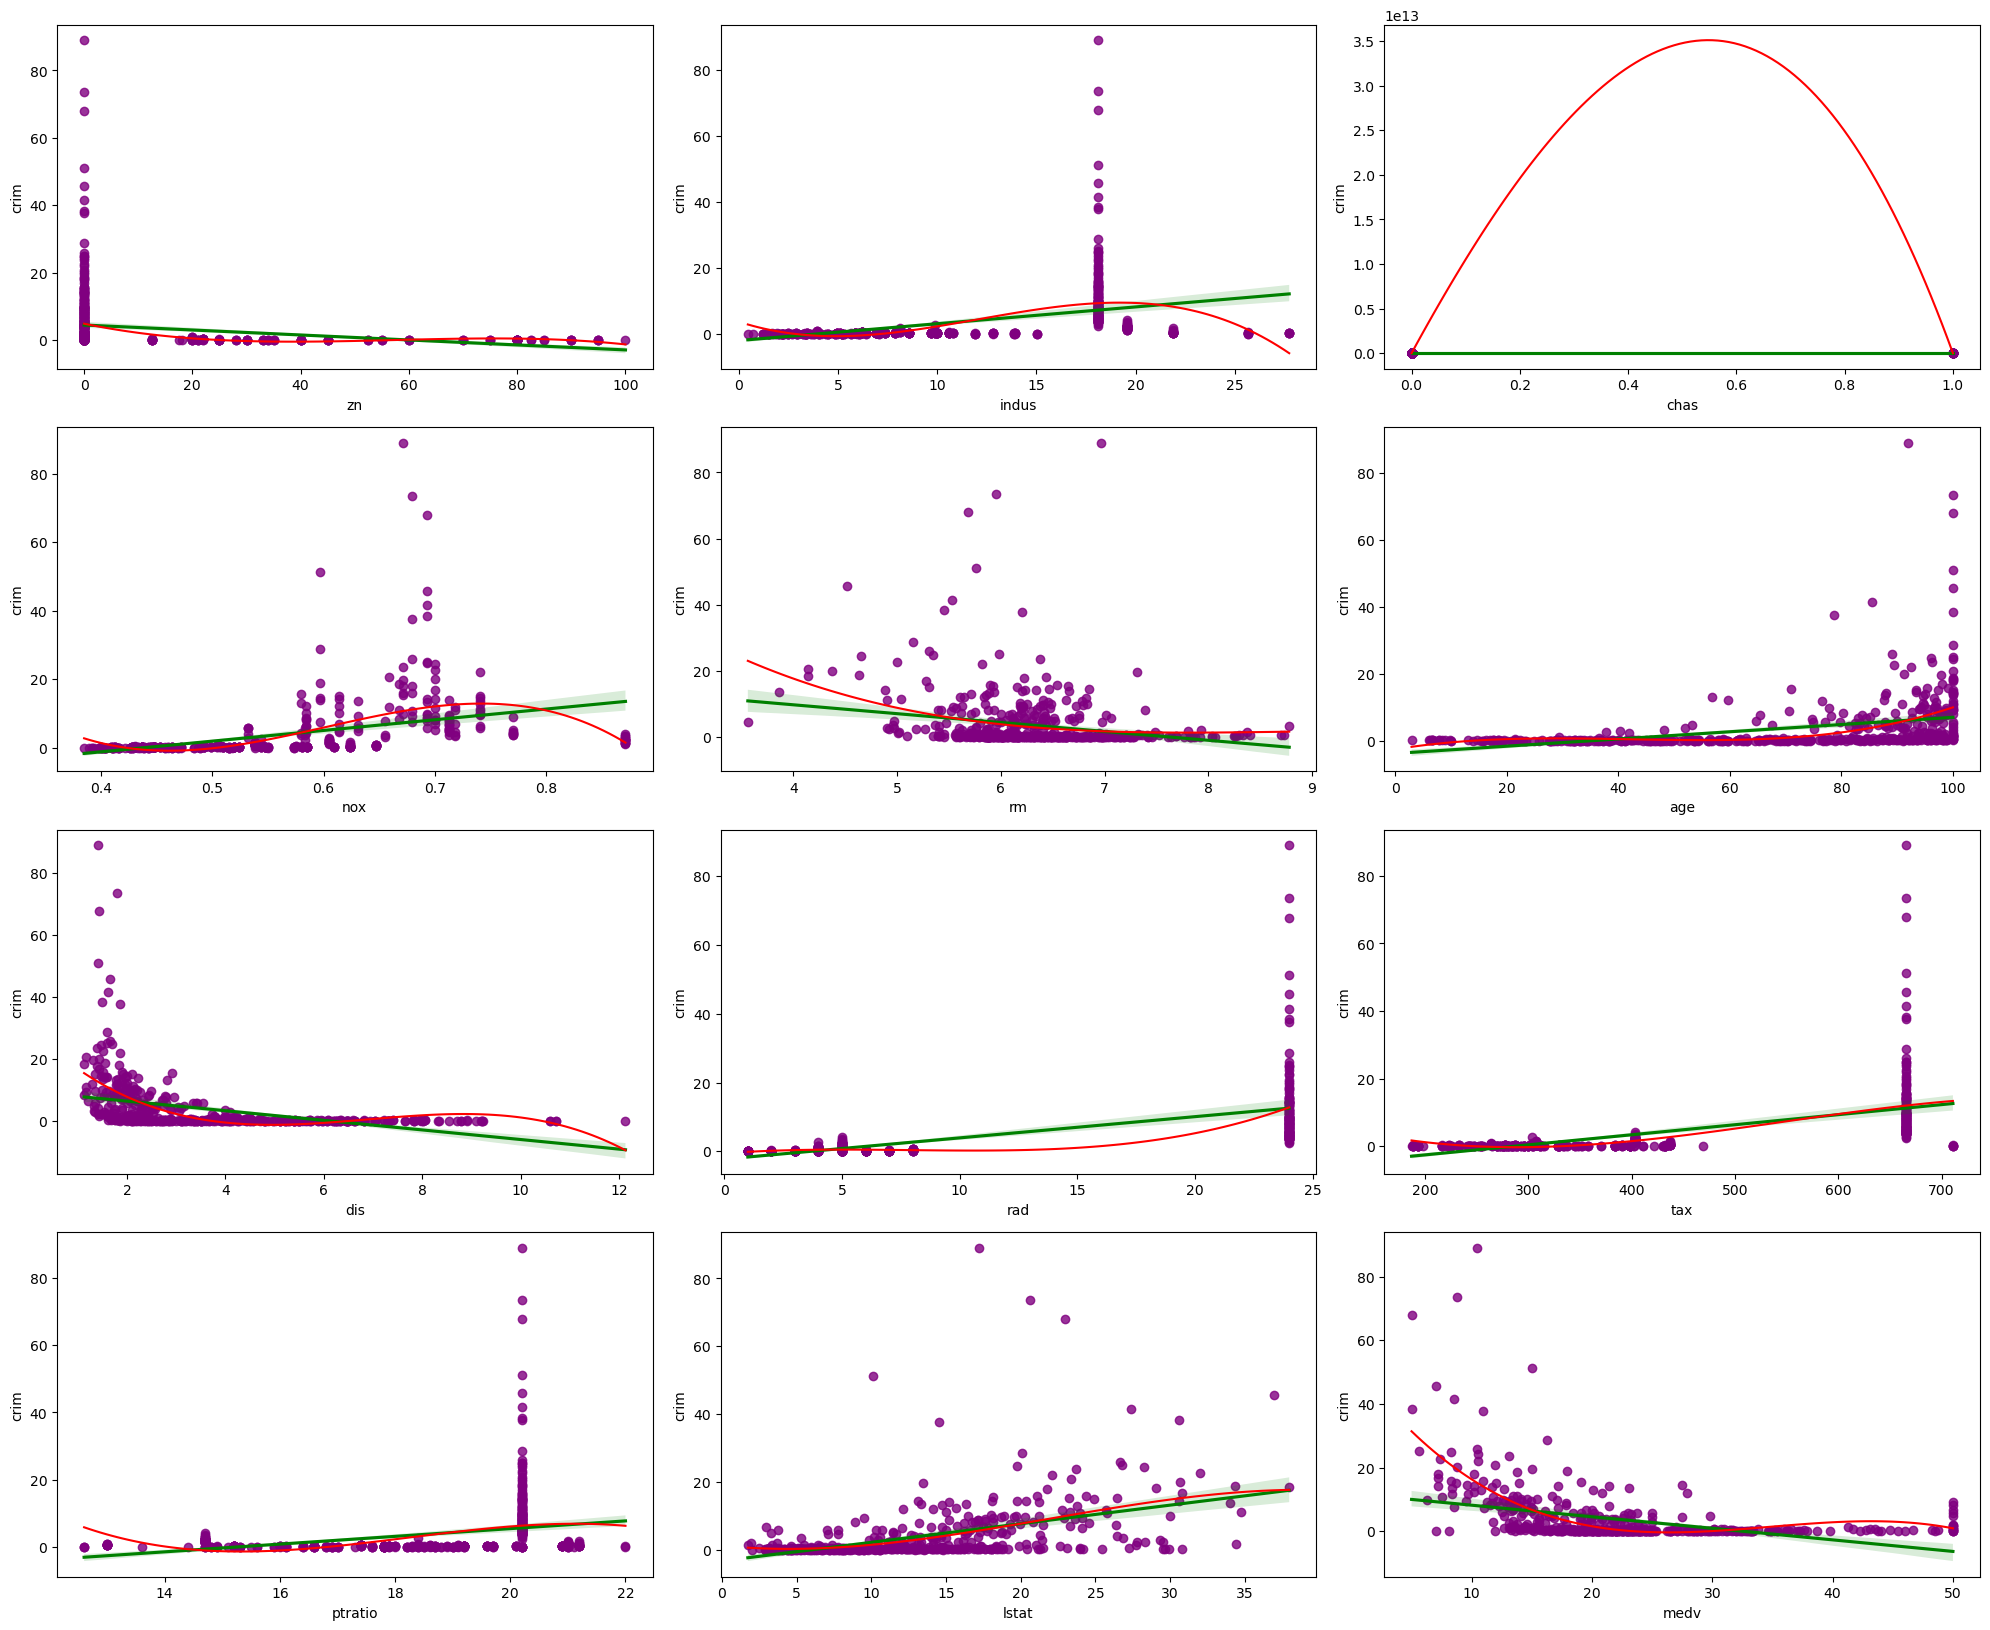

In [47]:
plt.figure(figsize=(20, 20))

for i, predictor in enumerate(predictors):
    X = np.column_stack((Boston[predictor], np.power(Boston[predictor], 2), np.power(Boston[predictor], 3)))
    y = Boston['crim']
    model = sm.OLS(y, sm.add_constant(X))  # Add constant for the intercept
    rslt = model.fit()
    
    plt.subplot(5, 3, i + 1)
    sns.regplot(x=predictor, y='crim', data=Boston, color='purple', line_kws={'color': 'green'})
    plt.xlabel(predictor)
    plt.ylabel('crim')
    
    # Plot the full polynomial regression line
    x = np.linspace(min(Boston[predictor]), max(Boston[predictor]), 100)
    X_pred = np.column_stack((x, x**2, x**3))
    y_pred = rslt.predict(sm.add_constant(X_pred))
    plt.plot(x, y_pred, color='red')

plt.tight_layout()
plt.show()


### The green line represents the linear regression line and the red line represents the polynomial regression line.
### Using this observation we find evidence for non-linearity for indus, nox, dis, ptratio and medv. In our case using the smaller model we are only interested in the non-linearity for dis and medv. 
### Non-linearity in a model suggests that the linear model is not well suited to capture the true relationship between predictor and response and more complex/alternative modelling techniques are required.